## Importing libraries and data

In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame, Series
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
#Load Data
csv_path = 'C:/Users/GGPC/Desktop/North_American_Superstore.csv'
df = pd.read_csv(csv_path, encoding="gbk")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,7981,CA-2015-103800,2015/1/3,2015/1/7,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,740,CA-2015-112326,2015/1/4,2015/1/8,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,741,CA-2015-112326,2015/1/4,2015/1/8,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
3,742,CA-2015-112326,2015/1/4,2015/1/8,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
4,1760,CA-2015-141817,2015/1/5,2015/1/12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [3]:
#  The column names in the original dataframe contain spaces and need to be replaced
df.rename(columns = lambda x : x.replace(' ',''),inplace = True)

In [4]:
df.shape
df.head()

,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,...,PostalCode,Region,ProductID,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit
0,7981,CA-2015-103800,2015/1/3,2015/1/7,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,...,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,740,CA-2015-112326,2015/1/4,2015/1/8,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,741,CA-2015-112326,2015/1/4,2015/1/8,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
3,742,CA-2015-112326,2015/1/4,2015/1/8,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,...,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
4,1760,CA-2015-141817,2015/1/5,2015/1/12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,...,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


## 1.Data Preprocessing


### 1.1 View data information

In [5]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RowID         9994 non-null   int64  
 1   OrderID       9994 non-null   object 
 2   OrderDate     9994 non-null   object 
 3   ShipDate      9994 non-null   object 
 4   ShipMode      9994 non-null   object 
 5   CustomerID    9994 non-null   object 
 6   CustomerName  9994 non-null   object 
 7   Segment       9994 non-null   object 
 8   Country       9994 non-null   object 
 9   City          9994 non-null   object 
 10  State         9994 non-null   object 
 11  PostalCode    9983 non-null   float64
 12  Region        9994 non-null   object 
 13  ProductID     9994 non-null   object 
 14  Category      9994 non-null   object 
 15  Sub-Category  9994 non-null   object 
 16  ProductName   9994 non-null   object 
 17  Sales         9994 non-null   float64
 18  Quantity      9994 non-null 

### 1.2 Deduplicate data


In [6]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RowID         9994 non-null   int64  
 1   OrderID       9994 non-null   object 
 2   OrderDate     9994 non-null   object 
 3   ShipDate      9994 non-null   object 
 4   ShipMode      9994 non-null   object 
 5   CustomerID    9994 non-null   object 
 6   CustomerName  9994 non-null   object 
 7   Segment       9994 non-null   object 
 8   Country       9994 non-null   object 
 9   City          9994 non-null   object 
 10  State         9994 non-null   object 
 11  PostalCode    9983 non-null   float64
 12  Region        9994 non-null   object 
 13  ProductID     9994 non-null   object 
 14  Category      9994 non-null   object 
 15  Sub-Category  9994 non-null   object 
 16  ProductName   9994 non-null   object 
 17  Sales         9994 non-null   float64
 18  Quantity      9994 non-null 

### 1.3 Eliminate data with obvious abnormal values

In [7]:
#  Count the number of Sales less than zero
df.loc[df['Sales']<0].Sales.count()


0

In [8]:
# Take the rows where Sales and Quantity are both greater than zero
df = df.loc[(df['Sales']>0)&(df['Quantity']>0)] 

### 1.4 If there are missing values, consider filling or deleting the entire row of data

In [9]:
# The missing value of the postal code does not affect our data analysis
df.isnull().sum()

RowID            0
OrderID          0
OrderDate        0
ShipDate         0
ShipMode         0
CustomerID       0
CustomerName     0
Segment          0
Country          0
City             0
State            0
PostalCode      11
Region           0
ProductID        0
Category         0
Sub-Category     0
ProductName      0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

### 1.5 Convert OrderDate from String to Datetime format

In [10]:
# Convert to datetime format
df['OrderDate'] = pd.to_datetime(df['OrderDate'])
df.info()

# View the date range of the customer's order
print('The latest order date：',df['OrderDate'].max())
print('The earliest order date：',df['OrderDate'].min())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   RowID         9994 non-null   int64         
 1   OrderID       9994 non-null   object        
 2   OrderDate     9994 non-null   datetime64[ns]
 3   ShipDate      9994 non-null   object        
 4   ShipMode      9994 non-null   object        
 5   CustomerID    9994 non-null   object        
 6   CustomerName  9994 non-null   object        
 7   Segment       9994 non-null   object        
 8   Country       9994 non-null   object        
 9   City          9994 non-null   object        
 10  State         9994 non-null   object        
 11  PostalCode    9983 non-null   float64       
 12  Region        9994 non-null   object        
 13  ProductID     9994 non-null   object        
 14  Category      9994 non-null   object        
 15  Sub-Category  9994 non-null   object  

## 2.Customer segments and customer profitability analysis（Based on RFM model）

A study by Arthur Hughes of the American Database Marketing Institute found that three important indicators in customer data analysis, namely: the last consumption (Recency), consumption frequency (Frequency), and consumption amount (Monetary). They are important standards for measuring customer value. RFM analysis is an exploratory analysis method.

### Customer Segments Classification:

Core (high, high, high): Absolutely high-quality customers with recent consumption time, high consumption frequency and consumption amount.

Loyal (low, high, high): The recent consumption time is relatively long, but the frequency and quantity of consumption are very high, indicating that this is a loyal customer who has not been here for a period of time and needs to actively keep in touch with him.

Whales (High, Low, High): The recent consumption time is relatively short, the consumption amount is high, but the frequency and the loyalty is not high, and the potential users must focus on development.

Slipping(low, low, high): Recently, the consumption time is relatively long and the consumption frequency is not high, but the consumption amount is high. It may be the users who will or have already lost. The measures should be focused on retention.

The remaining customers would be defined as Regular.

### Why RFM Model?

Identify quality customers, and providing personalized marketing services to them. It will be strong support for marketing decisions, these could measure customer value and customer profitability.

### Disadvantage of traditional model

The frequency used refers the number of orders placed by the user at all times, and there is an error in the cumulative effect of time.


### Improvements to the model:

New Frequency = The total number of orders/The number of years for the user to generate transactions

### 2.1 Obtain all orders placed by customers


In [11]:
#  Combine the same orders
df_f = df.copy()
df_f.drop_duplicates(subset=['OrderID'],keep='first',inplace=True)
df_freq = df_f.groupby('CustomerID',as_index=False).OrderID.count().rename(columns={'OrderID':'Frequency'})
df_freq.set_index('CustomerID',drop=True,inplace=True)
df_freq.head()

,Frequency
CustomerID,
AA-10315,5
AA-10375,9
AA-10480,4
AA-10645,6
AB-10015,3


### 2.2 Obtain the monetary, profit and recency by different customers

In [12]:
df_group = df.groupby('CustomerID')
df_rm = df_group.agg({'Sales':'sum','OrderDate':'max','Profit':'sum'}).rename(columns={'Sales':'Monetary'})
df_rm['Recency'] = (pd.to_datetime('2019-01-01') - df_rm['OrderDate']).dt.days
df_rm.head()
df_rm = df_rm.drop('OrderDate',axis=1)
df_rm.head()


,Monetary,Profit,Recency
CustomerID,,,
AA-10315,5563.560,-362.8825,186
AA-10375,1056.390,277.3824,21
AA-10480,1790.512,435.8274,261
AA-10645,5086.935,857.8033,57
AB-10015,886.156,129.3465,417


### 2.3 Obtain the average annual order frequency of different customers during their purchase period


In [13]:
DiffYears = df_group.agg({'OrderDate':(lambda df : df.dt.year.max() - df.dt.year.min()+1)}).rename(
    columns={'OrderDate':'DiffYears'}).DiffYears
DiffYears.head()
df_freq.Frequency=df_freq.Frequency/DiffYears
df_freq.head()

,Frequency
CustomerID,
AA-10315,1.25
AA-10375,2.25
AA-10480,1.00
AA-10645,1.50
AB-10015,1.00


### 2.4 Combine the above indicators


In [14]:
df_rfm = df_rm.merge(df_freq,on='CustomerID')
df_rfm.info()
df_rfm.head()
df_rfm.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 793 entries, AA-10315 to ZD-21925
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Monetary   793 non-null    float64
 1   Profit     793 non-null    float64
 2   Recency    793 non-null    int64  
 3   Frequency  793 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 31.0+ KB


,Monetary,Profit,Recency,Frequency
count,793.000000,793.000000,793.000000,793.000000
mean,2896.848500,361.156396,148.773014,1.818306
std,2628.670117,894.261812,186.111367,0.673193
min,4.833000,-6626.389500,2.000000,0.500000
25%,1146.050000,36.613100,32.000000,1.250000
50%,2256.394000,227.833800,77.000000,1.750000
75%,3785.276000,560.007800,185.000000,2.250000
max,25043.050000,8981.323900,1167.000000,5.000000


### 2.5 Divide the types of customers based on the median

In [15]:
# Calculate median of each value of RFM
r_med = df_rfm['Recency'].median()
f_med = df_rfm['Frequency'].median()
m_med = df_rfm['Monetary'].median()
r_med,f_med,m_med

(77.0, 1.75, 2256.394)

In [16]:
# Build a function to classify customers
def customer_type_func(frame): 
    customer_type_list = []
    for i in range(len(frame)):
        if frame.iloc[i,2]<=r_med and frame.iloc[i,3]>=f_med and frame.iloc[i,0]>=m_med:
            customer_type_list.append('Core')
        elif  frame.iloc[i,2]<=r_med and frame.iloc[i,3]<f_med and frame.iloc[i,0]>=m_med:
            customer_type_list.append('Loyal')
        elif  frame.iloc[i,2]>r_med and frame.iloc[i,3]>=f_med and frame.iloc[i,0]>=m_med:
            customer_type_list.append('Whales')
        elif  frame.iloc[i,2]>r_med and frame.iloc[i,3]<f_med and frame.iloc[i,0]>=m_med:
            customer_type_list.append('Slipping')
        else:
            customer_type_list.append('General')
    frame['CustomerType'] = customer_type_list
customer_type_func(df_rfm)

### 2.6 Analyze the overall profitability of different types of customers


In [17]:
# Obtain the total number of different types of customers and the number of customers with positive profit
df_rfm['ProfitType'] = (df_rfm.Profit>0)
df_ProfitCustNum= df_rfm.groupby(['CustomerType','ProfitType']).size().reset_index(name='ProfitCustNum')
df_ProfitCustNum

,CustomerType,ProfitType,ProfitCustNum
0,Core,False,32
1,Core,True,147
2,General,False,87
3,General,True,309
4,Loyal,False,9
5,Loyal,True,42
6,Slipping,False,11
7,Slipping,True,41
8,Whales,False,16
9,Whales,True,99


In [18]:
df_ProfitCustNum = df_ProfitCustNum[df_ProfitCustNum.ProfitType==True]
df_ProfitCustNum

,CustomerType,ProfitType,ProfitCustNum
1,Core,True,147
3,General,True,309
5,Loyal,True,42
7,Slipping,True,41
9,Whales,True,99


In [19]:
df_Customer_Num = df_rfm.groupby(['CustomerType']).size().reset_index(name='CustomerNum')
df_Customer_Num

,CustomerType,CustomerNum
0,Core,179
1,General,396
2,Loyal,51
3,Slipping,52
4,Whales,115


In [20]:
df_Customer_Num['ProfitRate'] = df_ProfitCustNum.ProfitCustNum.values/df_Customer_Num.CustomerNum
df_Customer_Num.head()

,CustomerType,CustomerNum,ProfitRate
0,Core,179,0.821229
1,General,396,0.780303
2,Loyal,51,0.823529
3,Slipping,52,0.788462
4,Whales,115,0.860870


In [21]:
df_Profit= df_rfm.groupby(['CustomerType']).Profit.sum().reset_index(name='Profit')
df_Profit

,CustomerType,Profit
0,Core,95770.4661
1,General,45615.9372
2,Loyal,30303.5112
3,Slipping,29365.3520
4,Whales,85341.7552


In [22]:
# Order amount and profit of different types of customers and their proportion in the total amount and total profit
df_Monetary = df_rfm.groupby('CustomerType').Monetary.sum().reset_index(name='Monetary')
df_Monetary['ProfitRate'] = df_Profit.Profit/df_Monetary.Monetary
df_Monetary['Profit'] = df_Profit.Profit
df_Monetary['MonetaryPerCust'] = df_Monetary.Monetary/df_Customer_Num.CustomerNum
df_Monetary['ProfitPerCust'] = df_Monetary.Profit/df_Customer_Num.CustomerNum
df_Monetary

,CustomerType,Monetary,ProfitRate,Profit,MonetaryPerCust,ProfitPerCust
0,Core,816862.0390,0.117242,95770.4661,4563.475078,535.030537
1,General,455864.3969,0.100065,45615.9372,1151.172719,115.191761
2,Loyal,236080.1130,0.128361,30303.5112,4629.021824,594.186494
3,Slipping,229137.1534,0.128156,29365.3520,4406.483719,564.718308
4,Whales,559257.1580,0.152598,85341.7552,4863.105722,742.102219


### 2.7 RFM model classification and profit visualization


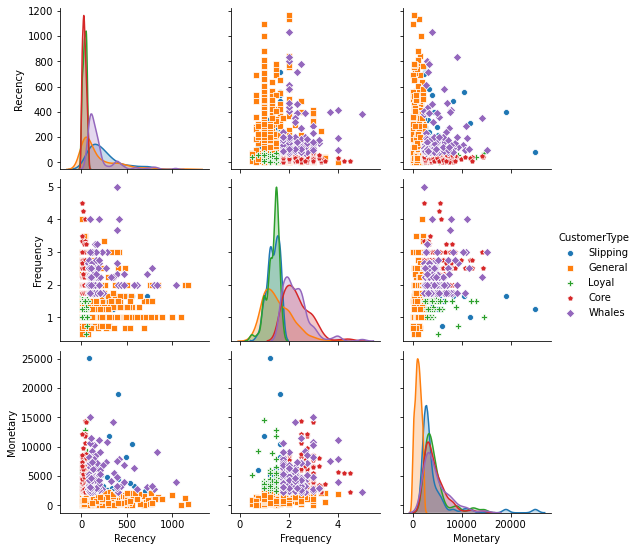

In [23]:
sns.pairplot(df_rfm,hue='CustomerType', x_vars=["Recency", "Frequency", "Monetary"],
    y_vars=["Recency", "Frequency", "Monetary"], markers=["o", "s", "P","p","D"])

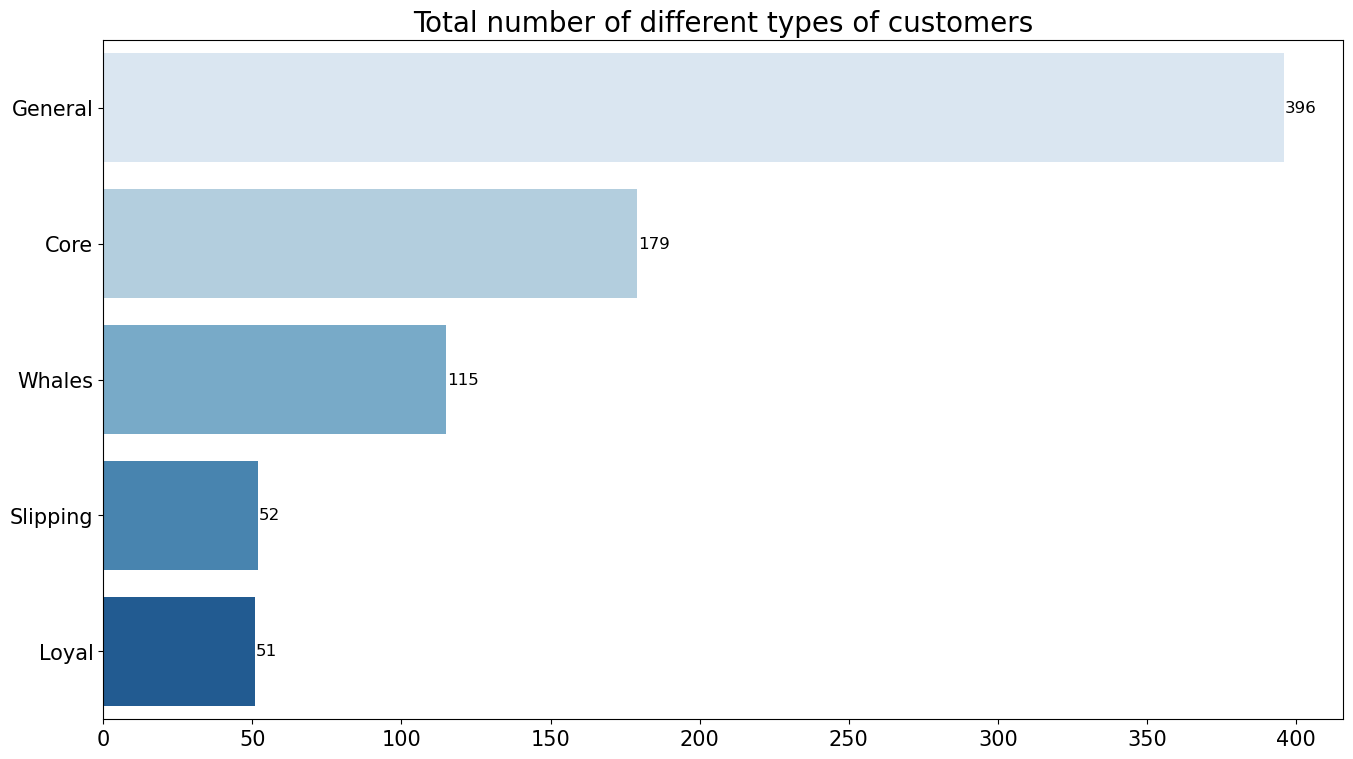

In [24]:
fig1 = plt.figure(1,figsize=(16,9),dpi=100)
ax1_1 = fig1.add_subplot(111)
sns.countplot(y='CustomerType',order=df_rfm['CustomerType'].value_counts(ascending=False).index,data=df_rfm,palette='Blues')
ax1_1.tick_params(labelsize=15)
ax1_1.set_title('Total number of different types of customers',fontsize=20)
ax1_1.set_xlabel('')
ax1_1.set_ylabel('')
num_by_type=list(df_rfm.groupby('CustomerType').size())
num_by_type=sorted(num_by_type,reverse=True)
for x,y in enumerate(num_by_type):
    ax1_1.text(y+0.2,x,'%s' %y,va='center',size=12)

Text(0.5, 1.0, 'Percentage of profit')

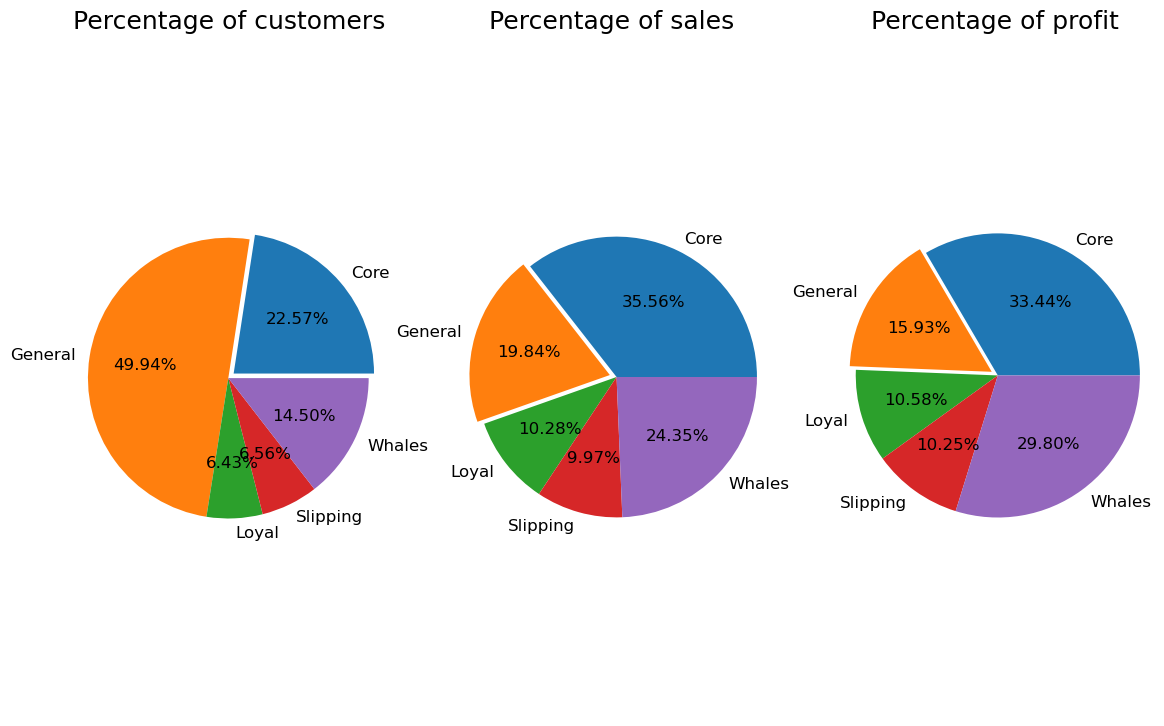

In [25]:
fig2 = plt.figure(2,figsize=(14,9),dpi=100)

ax2_1 = fig2.add_subplot(131)
labels=df_rfm.groupby('CustomerType').CustomerType.size().index
customer_num=df_rfm.groupby('CustomerType').CustomerType.size()
explode=[0.05,0,0,0,0]
ax2_1.pie(customer_num,explode=explode,labels=labels,textprops={'fontsize':12},shadow=False,autopct='%.2f%%')
ax2_1.axis('equal')
ax2_1.set_title('Percentage of customers',fontsize=18)

ax2_2 = fig2.add_subplot(132)
Monetary_sum=df_rfm.groupby('CustomerType').Monetary.sum()
explode=[0,0.05,0,0,0]
ax2_2.pie(Monetary_sum,explode=explode,labels=labels,textprops={'fontsize':12},shadow=False,autopct='%.2f%%')
ax2_2.axis('equal')
ax2_2.set_title('Percentage of sales',fontsize=18)

ax2_3 = fig2.add_subplot(133)
Porfit_sum=df_rfm.groupby('CustomerType').Profit.sum()
explode=[0,0.05,0,0,0]
ax2_3.pie(Porfit_sum,explode=explode,labels=labels,textprops={'fontsize':12},shadow=False,autopct='%.2f%%')
ax2_3.axis('equal')
ax2_3.set_title('Percentage of profit',fontsize=18)

### Summary

According to our classification, we have obtained the distribution of 5 types of customer groups.The proportion of general customers is the largest, up to 49.94%. This type of customer performs poorly in the dimensions of sales and profit, it shows that the customer's overall consumption frequency and amount are not ideal, and it is necessary to re-examine whether the product is facing problems.

Our core customers perform best and are loyal high-value customers. We can consider tilting more resources to keep such customers and prevent loss, such as designing VIP services and providing recommendations for high-value additional services.

For whales group, although the number of such customers is only 14.5%, it also performed well in terms of sales ratio and profit, showing a certain degree of loyalty and user stickiness, the main goal is to increase the frequency and amount of purchases. Strategies such as cross-selling, personalized recommendations, and combination coupons can be adopted to increase their purchase amount and promote its repurchase.

The remaining two customer groups did not perform well in all dimensions, we can maintain and improve its consumption status by means of conventional gift exchange and giving, shopping community activities, sign-in, and free shipping.

## 3. Cohort Analysis

Cohort analysis is a kind of behavior analysis, which mainly identifies customers by dividing them into related groups in order to better understand their behavior.


### 1. Mainly includes two forms:
Initial behavior: such as "first use of App", "successful registration" or "first purchase behavior", etc.

Retention behavior: it can be any behavior of the user, such as making purchase, using App, sharing, etc.

### 2. Analysis Process
By grouping users according to the time of the initial behavior (to get the same group), and then counting the frequency of occurrence of the retained behavior in different time periods after the initial behavior time.

### 3. Why Cohort Analysis
Cohort analysis allows us to observe the behavior of customers at different stages of the life cycle. It is suitable for the data indicators we care about, such as revenue, user retention, sharing and dissemination. 


### 3.1 Each year is divided into two half-years as the cycle

In [26]:
df1 = df_f.copy()
# Define the time node separately as the start of each cycle
time_nodes = pd.to_datetime(['2014-12-31','2015-06-30','2015-12-31','2016-06-30','2016-12-31','2017-06-30','2017-12-31','2018-06-30','2018-12-31'])
# Each cycle is identified by 2015H1, for example, 2015H1 means the first half of 2015
label = ['2015H1','2015H2','2016H1','2016H2','2017H1','2017H2','2018H1','2018H2']
# Save the customer ID corresponding to different orders in each cycle, there may be duplicate values
customer_list = []
# Save the customer ID that have placed orders in each cycle, no duplicate values
u_customer_list = []  

df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5009 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   RowID         5009 non-null   int64         
 1   OrderID       5009 non-null   object        
 2   OrderDate     5009 non-null   datetime64[ns]
 3   ShipDate      5009 non-null   object        
 4   ShipMode      5009 non-null   object        
 5   CustomerID    5009 non-null   object        
 6   CustomerName  5009 non-null   object        
 7   Segment       5009 non-null   object        
 8   Country       5009 non-null   object        
 9   City          5009 non-null   object        
 10  State         5009 non-null   object        
 11  PostalCode    5003 non-null   float64       
 12  Region        5009 non-null   object        
 13  ProductID     5009 non-null   object        
 14  Category      5009 non-null   object        
 15  Sub-Category  5009 non-null   object  

### 3.2 Obtain the customer ID of the order placed in different periods


In [29]:
for i in range(8):
    customer_half_year = df1.loc[(df1.OrderDate>time_nodes[i])&(df1.OrderDate<=time_nodes[i+1]),:].CustomerID
    u_customer_half_year = list(set(customer_half_year))
    print(label[i] +' Number of customers who placed an order before deduplication:', len(customer_half_year))
    print(label[i] +' Number of customers placing orders after deduplication:', len(u_customer_half_year))
    customer_list.extend(customer_half_year)
    u_customer_list.append(u_customer_half_year)
# print(len(customer_list))

2015H1 Number of customers who placed an order before deduplication: 332
2015H1 Number of customers placing orders after deduplication: 281
2015H2 Number of customers who placed an order before deduplication: 637
2015H2 Number of customers placing orders after deduplication: 456
2016H1 Number of customers who placed an order before deduplication: 358
2016H1 Number of customers placing orders after deduplication: 293
2016H2 Number of customers who placed an order before deduplication: 680
2016H2 Number of customers placing orders after deduplication: 455
2017H1 Number of customers who placed an order before deduplication: 473
2017H1 Number of customers placing orders after deduplication: 352
2017H2 Number of customers who placed an order before deduplication: 842
2017H2 Number of customers placing orders after deduplication: 517
2018H1 Number of customers who placed an order before deduplication: 607
2018H1 Number of customers placing orders after deduplication: 436
2018H2 Number of cus

### 3.3 It is impossible to determine the ID of all old customers in the history. Therefore, an assumption is made: the customers who placed orders in the first half of 2015 are old customers, and the new customers will be calculated from the second half of 2015. We begin to calculate customer retention rate in the first half of 2016.

In [31]:
for i, customer_list_half_year in enumerate(u_customer_list):
    if i>0 and i<7:
        last_list = []  # Save all customer IDs in the past
        retain_list = []  # Save the number of customers repurchased every six months in the future
        for j in range(0,i):
            last_list.extend(u_customer_list[j])
        last_list = list(set(last_list))
        new_list = [cust for cust in customer_list_half_year if cust not in last_list]  # Save the new customer ID in the current cycle
        for k in range(i+1,8):
            retain_list.append(len([cust for cust in u_customer_list[k] if cust in new_list]))
        print(label[i]+' The number of New Customer is:', len(new_list), ' The retention rate is:',[round(i/len(new_list), 3) for i in retain_list])

2015H2 The number of New Customer is: 314  The retention rate is: [0.373, 0.589, 0.452, 0.659, 0.545, 0.752]
2016H1 The number of New Customer is: 68  The retention rate is: [0.544, 0.426, 0.676, 0.588, 0.735]
2016H2 The number of New Customer is: 68  The retention rate is: [0.324, 0.603, 0.574, 0.721]
2017H1 The number of New Customer is: 36  The retention rate is: [0.667, 0.583, 0.861]
2017H2 The number of New Customer is: 15  The retention rate is: [0.4, 0.8]
2018H1 The number of New Customer is: 5  The retention rate is: [0.6]


### Summary
By calculating the retention rate, we find that the retention rate has decreased in the first half of each year, but the situation has improved in the second half of the year. However, starting from 2017, the increase in new users is not obvious compared to the past, and the number of new users is also very small.